# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Serlin Aprilia
- **Email:** serlinaprilia32@gmail.com
- **ID Dicoding:** serlin_aprilia_ACFP
- **Cohort ID:** MS141D5X0569

## Menentukan Pertanyaan Bisnis



```
`# This is formatted as code`
```

- Bagaimana distribusi harga produk berdasarkan metode pembayaran?
- Di wilayah geografis mana saja terdapat konsentrasi pelanggan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg
from scipy import stats

import altair as alt

## Data Wrangling

### Gathering Data

**Insight:**
- Mengumpulkan semua tabel yang ada pada data
- Tabel yang ada yaitu customers, geolocation, order item, order payments, order reviews, order, product category, poducts, dan selle.

In [ ]:
## Data customers
customers_df = pd.read_csv('/content/sample_data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Data geolocation
geolocation_df = pd.read_csv('/content/sample_data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Data order item
order_items_df = pd.read_csv('/content/sample_data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Data order payment
order_payment_df = pd.read_csv('/content/sample_data/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Data order reviews
order_reviews_df = pd.read_csv('/content/sample_data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# Data order
orders_df = pd.read_csv('/content/sample_data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Data produk kategori
product_category_df = pd.read_csv('/content/sample_data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Data product
products_df = pd.read_csv('/content/sample_data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Data seller
sellers_df = pd.read_csv('/content/sample_data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [ ]:
# Fungsi untuk mencetak analisis info DataFrame, duplikasi, serta nilai data
def analyze_table(df, name):
    print(f"\n=== Analisis untuk {name} ===")

    # Print info table
    print(f"\n--- Info Tabel ---\n")
    df.info()

    # Print missing values table
    print(f"\n--- Missing Value ---\n")
    print(df.isna().sum())

    # Print duplicated values count
    print(f"\n--- Duplikat ---\n")
    print(df.duplicated().sum())

    # Print table description
    print(f"\n--- Deskripsi Tabel ---\n")
    print(df.describe(include="all"))  # Tambahkan include="all" untuk kolom object


# Fungsi untuk memproses semua DataFrame
def analyze_dataframes(dataframes):
    for name, df in dataframes.items():
        analyze_table(df, name)


# nama: DataFrame yang akan di acces
dataframes = {
    "customers_df": customers_df,
    "geolocation_df": geolocation_df,
    "order_items_df": order_items_df,
    "order_payment_df": order_payment_df,
    "order_reviews_df": order_reviews_df,
    "orders_df": orders_df,
    "product_category_df": product_category_df,
    "products_df": products_df,
    "sellers_df": sellers_df,
}

# Panggil fungsi analisis
analyze_dataframes(dataframes)



=== Analisis untuk customers_df ===

--- Info Tabel ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

--- Missing Value ---

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

--- Duplikat ---

0

--- Deskripsi Tabel ---

                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique          

**Insight:**
- *Data customers* -> data bersih
- *Data geolocation* -> terdapat data duplikasi
- *Data order items* -> kolom shipping_limit_date harusnya datetime bukan object
- *Data order payments* -> data bersih
- *Data order reviews* -> kolom review_comment_title &
review_comment_message mempunyai missing vallue, tipe data date masih object
- *Data orders* -> tipe data date masi berupa object
- *Data product category* -> data bersih
- *Data product* -> memiliki missing value di semua kolom kecuali kolom product_id
- *Data sellers* -> data bersih

### Cleaning Data

In [ ]:
# cleaning data geolocation
geolocation_df.drop_duplicates(inplace=True)
# mengecek apakah masih ada data yang terduplikasi
geolocation_df.duplicated().sum()

0

In [ ]:
# cleaning data  order items
# Convert datetime datatype
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

#mengecek apakah sudah terconvert
order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# cleaning data order reviews
#menghapus kolom yang missing vallues
order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message',
                               'review_answer_timestamp'], inplace=True)

In [ ]:
#mengecek data order reviews
order_reviews_df.isna().sum()


,0
review_id,0
order_id,0
review_score,0
review_creation_date,0


In [ ]:
#convert timestamp
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

In [ ]:
# mengecek data order review
order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   review_id             99224 non-null  object        
 1   order_id              99224 non-null  object        
 2   review_score          99224 non-null  int64         
 3   review_creation_date  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
# cleaning data orders
# mengubah data type menjadi timestamp
# Converting date-related columns to datetime data type
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
# Drop kolom yang missing value
orders_df.dropna(inplace=True)

#mengecek data order setelah di cleaning
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
# meghapus kolom yang tidak digunakan
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

products_df.drop(product_drop_cols, axis= 1, inplace= True)

**Insight:**
- Geolocation: Duplikasi dihapus dengan drop_duplicates(), memastikan data geolocation lebih bersih dan tidak ada entri ganda.

- Order Items: Kolom shipping_limit_date berhasil dikonversi ke datetime, memungkinkan analisis berbasis waktu seperti pengukuran waktu pengiriman.

- Products: Menghapus kolom yang tidak relevan (seperti dimensi produk), memperkecil kompleksitas dataset dan fokus pada atribut penting.

- Order Reviews: Kolom dengan missing values dihapus (review_comment_title, dll.), membuat dataset lebih fokus untuk analisis kepuasan pelanggan.

- Orders: Mengonversi kolom tanggal menjadi datetime dan menghapus baris dengan missing values, memastikan data pesanan siap untuk analisis berbasis waktu dan kualitas.

- Mengurangi kompleksitas dataset dan memfokuskan analisis pada elemen-elemen kunci yang lebih penting


## Exploratory Data Analysis (EDA)

*A. Explore data customer*

In [ ]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
33090,d0602b514179e7ed50e801cc02769bac,ce05c653348a8e630ebbb1fd1e0968d2,74080,goiania,GO
87543,16b4fe84e11d113214ba5bfc967bf782,3171b4d88a6e5197365277f56c7a9e7c,60192,fortaleza,CE
54314,cc4e2f483459498c9ce82a70ff415752,d3391cadc57741a0defe8a569e476813,27930,macae,RJ
28343,2d46890758e23182b34e1f51bdd22c50,23873697bb91ccf9a51ef84f375e8590,11065,santos,SP
45165,90375cdb2ffb6381f35042caac83a65d,879e52fcfc1cff3833627a733de4a9ff,95535,terra de areia,RS


In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
#customer paling banyak berasal dari Sao paulo

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


*B. Explore data orders*

In [ ]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
69455,536b55df90b1eadec8cd2151d8d54536,1938eb8b42615427aeb761316ba56d7f,delivered,2017-11-04 14:16:12,2017-11-04 14:30:29,2017-11-06 16:18:25,2017-11-14 18:33:20,2017-11-30
93403,9e49e81744d0890cd05aeb8d8c10d28a,3771914eaea4a652b9eda2ad97add048,delivered,2018-08-21 13:32:24,2018-08-21 13:51:00,2018-08-27 15:54:00,2018-08-30 14:22:52,2018-09-03
23288,2a02e0744a44c3062272575a439947e4,187f706629173579fa6ab0deae7ef90f,delivered,2017-07-06 12:30:26,2017-07-06 12:43:49,2017-07-06 12:49:07,2017-07-12 20:12:35,2017-07-26
88052,a0f5fea75f554a37cc21f2db68319ce0,c021182f0eb57d18ef4283cff6d0c724,delivered,2017-04-20 19:21:32,2017-04-22 15:21:15,2017-04-24 13:20:27,2017-05-02 15:51:25,2017-05-16
97727,343784c8ebeaaa9505508f89e3eea256,39de0d11bb661ebb0dfa0067edd5292c,delivered,2018-06-21 12:41:34,2018-06-22 02:59:10,2018-06-22 13:15:00,2018-06-28 14:03:37,2018-07-19


In [ ]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [ ]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
7972,281bcc5174ebdbddcfcdc68322ee9527,7120f37eddaf23118bf763914cf31fa6,delivered,2018-04-05 18:54:25,2018-04-05 19:09:31,2018-04-07 01:42:30,2018-04-18 19:05:59,2018-04-25,12.0
27970,0a8b7ed1fb705a8af99575dc742cd328,de10aea6bf74351ad7b1356c45fafb6a,delivered,2017-07-20 14:00:11,2017-07-20 14:10:19,2017-07-25 20:43:04,2017-07-28 21:04:28,2017-08-09,3.0
23911,df0558355915aa6d41e3eb7067957978,b5157b9f9688400a393d5afb2e4fb44d,delivered,2018-02-20 11:02:32,2018-02-22 02:31:05,2018-02-23 19:15:40,2018-03-14 15:27:05,2018-03-16,19.0
77659,cf73e2cb1f4a9480ed70c154da3d954a,ef1ed1347404166e73e8f3977ffcbca0,delivered,2018-01-11 11:23:09,2018-01-12 02:38:33,2018-01-13 01:07:00,2018-01-17 14:36:38,2018-02-01,5.0
38253,b3e7c48746eba08d51acd48ea21e6c07,3e9da517604550f3c89b910c3af40a92,delivered,2017-05-23 15:22:21,2017-05-23 15:30:32,2017-05-24 14:07:02,2017-06-28 13:27:40,2017-06-21,35.0


In [ ]:
orders_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,9.292429
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-16.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,12.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,205.000000


*C.Menggabungkan tabel data*

In [ ]:
# menggabunggkan customers_df & orders_df
customer_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [ ]:
# menggabungkan order_payment & order_reviews
order_payment_review_df = pd.merge(
    left=order_payment_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_review_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-10
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,2018-06-30
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-19
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-21


In [ ]:
# mengelompokan jenis pembayaran
order_payment_review_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [ ]:
# menggelompokan payment type dan melakukan agg
order_payment_review_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [ ]:
order_payment_review_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date
count,104477,104477.000000,104477,104477.000000,104477.000000,103677,103677.000000,103677
unique,99440,NaN,5,NaN,NaN,98409,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,f28281373ab8815bafafe371218f02ce,NaN,NaN
freq,29,NaN,77198,NaN,NaN,29,NaN,NaN
mean,NaN,1.093379,NaN,2.856418,153.923071,NaN,4.083886,2018-01-11 09:45:35.808327680
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,2016-10-02 00:00:00
25%,NaN,1.000000,NaN,1.000000,56.780000,NaN,4.000000,2017-09-21 00:00:00
50%,NaN,1.000000,NaN,1.000000,100.000000,NaN,5.000000,2018-01-31 00:00:00
75%,NaN,1.000000,NaN,4.000000,171.690000,NaN,5.000000,2018-05-15 00:00:00
max,NaN,29.000000,NaN,24.000000,13664.080000,NaN,5.000000,2018-08-31 00:00:00


In [ ]:
# menggabungkan customers_orders & payments_reviews
customer_df = pd.merge(
    left=customer_orders_df,
    right=order_payment_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10


In [ ]:
# menggabungkan order_items & sellers
item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
# menggabungkan products & product_category
products_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [ ]:
# menggabungkan seller dan producct
sellers_df = pd.merge(
    left=products_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


*D.Explore data geolocation*

In [ ]:
# menggambil sampel data
geolocation_df.sample(5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
40258,2976,-23.473080,-46.713183,sao paulo,SP
924104,89120,-26.824904,-49.275313,timbo,SC
486708,25560,-22.768764,-43.374793,são joão de meriti,RJ
434577,21866,-22.882374,-43.246776,rio de janeiro,RJ
646492,38407,-18.909992,-48.190687,uberlandia,MG


In [ ]:
# menggabungkan seluruh data
all_data = pd.merge(
    left=customer_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [ ]:
analyze_dataframes(all_data)


=== Analisis untuk customer_id ===

--- Info Tabel ---

<class 'pandas.core.series.Series'>
RangeIndex: 118686 entries, 0 to 118685
Series name: customer_id
Non-Null Count   Dtype 
--------------   ----- 
118686 non-null  object
dtypes: object(1)
memory usage: 927.4+ KB

--- Missing Value ---

0

--- Duplikat ---

19245

--- Deskripsi Tabel ---

count                               118686
unique                               99441
top       270c23a11d024a44c896d1894b261a83
freq                                    63
Name: customer_id, dtype: object

=== Analisis untuk customer_unique_id ===

--- Info Tabel ---

<class 'pandas.core.series.Series'>
RangeIndex: 118686 entries, 0 to 118685
Series name: customer_unique_id
Non-Null Count   Dtype 
--------------   ----- 
118686 non-null  object
dtypes: object(1)
memory usage: 927.4+ KB

--- Missing Value ---

0

--- Duplikat ---

22590

--- Deskripsi Tabel ---

count                               118686
unique                               960

In [ ]:
# Memastikan tidak ada missing values tersisa
all_data.dropna(inplace=True)

In [ ]:
# Cek apakah ada missing value
all_data.isna().sum()


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0


In [ ]:
#save ke file csv data yang sudah di cleaning
all_data.to_csv('/content/all_data.csv', index=False)



## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori barang yang banyak terjual


In [ ]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(10)

sum_order_items_df.head()


,product_category_name_english,products
7,bed_bath_table,11684
43,health_beauty,9749
65,sports_leisure,8734
39,furniture_decor,8554
15,computers_accessories,7926


In [ ]:


# Create the horizontal bar chart
chart = alt.Chart(sum_order_items_df).mark_bar().encode(
    x=alt.X('products', title='Number of Products'),
    y=alt.Y('product_category_name_english', sort='-x', title='Product Category'),
    color=alt.Color('product_category_name_english', legend=None),
    tooltip=['product_category_name_english', 'products']
).properties(
    title='Kategori produk paling banyak dijual',
    width=600,
    height=400
)

# Display the chart
chart


alt.Chart(...)

### Pertanyaan 2: Bagaimana persebaran rating pembeli



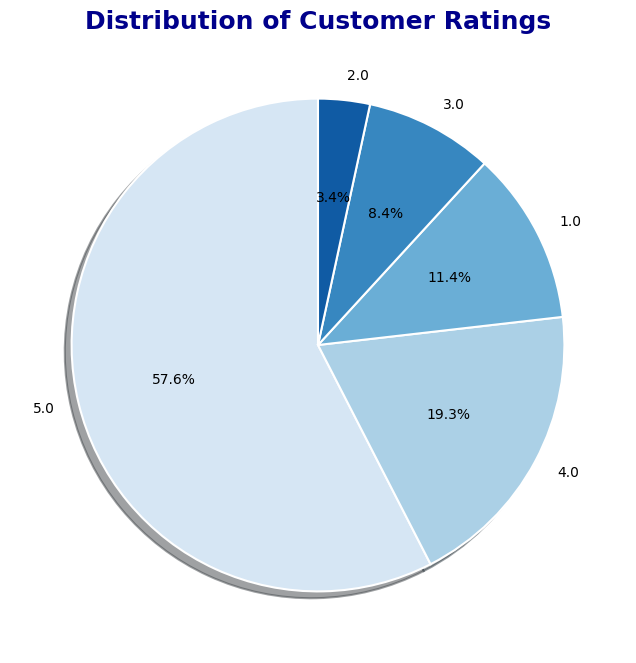

In [ ]:
import matplotlib.pyplot as plt


review_scores = all_data['review_score'].value_counts()


most_common_score = review_scores.idxmax()


import seaborn as sns
colors = sns.color_palette("Blues", len(review_scores))

plt.figure(figsize=(8, 8))
plt.pie(
    review_scores.values,
    labels=review_scores.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    shadow=True,
)


plt.title("Distribution of Customer Ratings", fontsize=18, fontweight='bold', color='darkblue')

# Display the pie chart
plt.show()


## Analisis Lanjutan (Opsional)

In [ ]:
#melihat tanggal awal dan terakhir pembelian
print('Min : {}, Max : {}'.format(min(all_data.order_purchase_timestamp), max(all_data.order_purchase_timestamp)))

Min : 2016-10-03 09:44:50, Max : 2018-08-29 15:00:37


In [ ]:
#Menghitung RFM
import datetime as dt
pin_date = max(all_data.order_purchase_timestamp) + dt.timedelta(1)

#Membuat dataframe RFM
rfm = all_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x: (pin_date - x.max()).days,
    'order_item_id' : 'count',
    'payment_value' : 'sum'})

#Merubah nama kolom
rfm.rename(columns = {'order_purchase_timestamp' : 'Recency',
                      'order_item_id' : 'Frequency',
                      'payment_value' : 'Monetary'}, inplace = True)

rfm.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


## Conclusion

- Kategori barang yang banyak terjual
barang yang paling banyak terjual adalah bed-bath-table dengan penjualan sebanyak 11684.
- Persebaran rating pembeli
rating pembeli yang paling besar ada di score 5 dengan presentase 57,6%